In [ ]:
import streamlit as st
import sksurv
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.linear_model.coxph import BreslowEstimator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
import pickle

In [ ]:
rsf = pickle.load(open("rfmodel.sav", 'rb'))

In [6]:
st.title('Prediction model for post-SVR HCC (SMART model)') 

2022-02-21 17:36:02.244 
  command:

    streamlit run C:\Users\masayasato\Anaconda3\envs\Sksurv_streamlit20220209\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [9]:
st.markdown("Enter the following items to display the predicted HCC risk")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [10]:
with st.form('user_inputs'): 
  gender = st.selectbox('gender', options=['female', 'male']) 
  age=st.slider("age", 0, 100, 50, 1)
  BMI=st.slider("BMI", 0.0, 50.0, 25.0, 0.1)
  alc60 = st.selectbox('Daily alcoholic consumption', options=['Less than 60g', '60g or more']) 
  PLT=st.slider("Platelet count (×10^4/µL)", 0.0, 100.0, 20.0, 0.1)
  AFP=st.slider("AFP (ng/mL)", 0.0, 50.0, 5.0, 0.1) 
  ALB=st.slider("Albumin (g/dL)", 0.0, 10.0, 4.0, 0.1)
  TBil=st.slider("Total bilirubin (mg/dL)", 0.0, 10.0, 1.0, 0.1)
  AST=st.slider("AST (IU/L)", 0, 300, 50, 1)
  ALT=st.slider("ALT (IU/L)", 0, 300, 50, 1)
  GGT=st.slider("GGT (IU/L)", 0, 1000, 50, 1)
  DM= st.selectbox('Diabetes', options=['absent', 'present']) 
  st.form_submit_button() 

In [11]:
if gender == 'male': 
  gender = 1

elif gender == 'female':
  gender = 0 

In [12]:
if alc60 == '60g or more': 
  alc60 = 1 

elif alc60 == 'Less than 60g': 
  alc60 = 0 

In [13]:
if DM == 'present': 
  DM = 1 

elif DM == 'absent': 
  DM = 0 

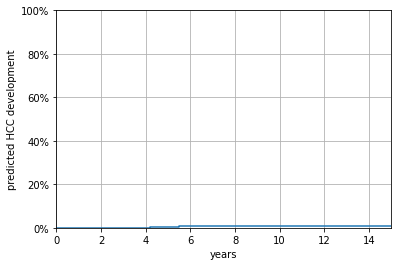

In [48]:
surv = rsf.predict_survival_function(pd.DataFrame(
    data={'gender': [gender], 
          'age': [age],
          'BMI': [BMI],
          'alc60': [alc60],
          'PLT': [PLT],
          'AFP': [AFP],
          'ALB': [ALB],
          'TBil': [TBil],
          'AST': [AST],
          'ALT': [ALT],
          'GGT': [GGT],
          'DM': [DM]
         }
), return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.xlim(0,10)
plt.ylim(0,1)
plt.ylabel("predicted HCC development")
plt.xlabel("years")
plt.grid(True)

plt.gca().invert_yaxis()

plt.yticks([0.0, 0.2, 0.4,0.6,0.8,1.0],
            ['100%', '80%', '60%', '40%', '20%', '0%'])
plt.savefig("img.png")

In [ ]:
st.subheader("HCC risk for submitted patient")

In [ ]:
st.image ("img.png")